<a href="https://colab.research.google.com/github/liyachittilappilly/Delivery-Time-Prediction/blob/main/Delivery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1. Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For 3D plotting
from mpl_toolkits.mplot3d import Axes3D

# For machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 2. Load the dataset
d = pd.read_csv("/content/delivery.csv")  # Replace with your actual file
print(d.head())


   n.prod  distance  delTime
0       7       560    16.68
1       3       220    11.50
2       3       340    12.03
3       4        80    14.88
4       6       150    13.75


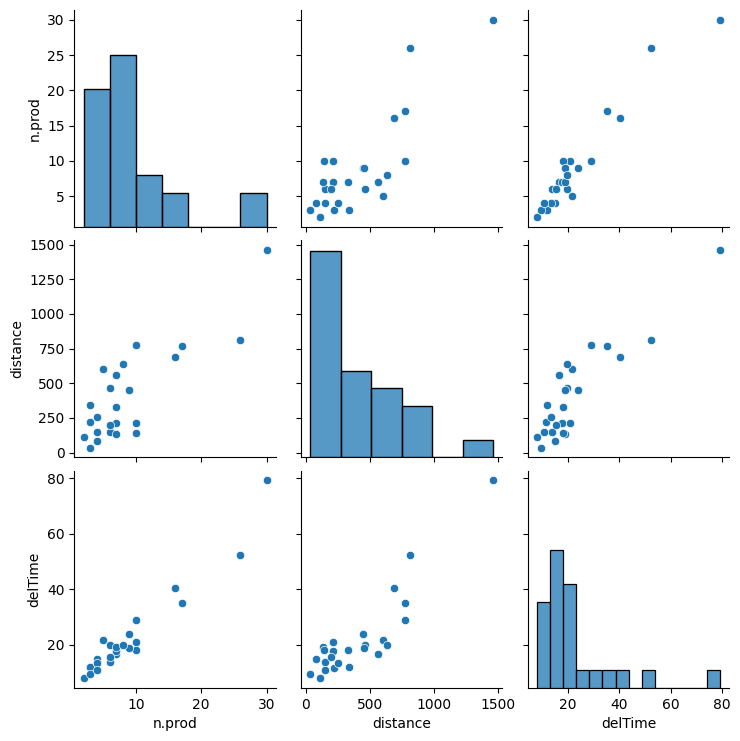

In [2]:
# Visualizing pairwise relationships
sns.pairplot(d)
plt.show()


In [3]:
# Feature and Target
X = d[["distance"]]  # Feature
y = d["delTime"]     # Target

# Model training
model1 = LinearRegression()
model1.fit(X, y)

# Results
print("Intercept:", model1.intercept_)
print("Coefficient:", model1.coef_)


Intercept: 4.961158859605799
Coefficient: [0.04256949]


In [5]:
# Features and Target
X_multi = d[["n.prod", "distance"]]
y = d["delTime"]

# Training model
model2 = LinearRegression()
model2.fit(X_multi, y)

# R² and Adjusted R²
r2 = model2.score(X_multi, y)
n = X_multi.shape[0]  # number of rows
p = X_multi.shape[1]  # number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("R² Score:", r2)
print("Adjusted R² Score:", adjusted_r2)

R² Score: 0.9595937494832257
Adjusted R² Score: 0.9559204539817008


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


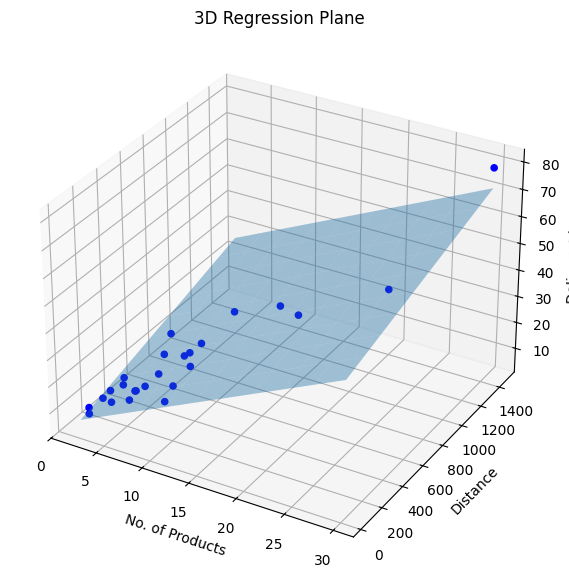

In [7]:
# 3D Plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

xs = d['n.prod']
ys = d['distance']
zs = d['delTime']

# Scatter actual data
ax.scatter(xs, ys, zs, alpha=1, c='blue')

# Create a surface
x_surf, y_surf = np.meshgrid(
    np.linspace(xs.min(), xs.max(), 10),
    np.linspace(ys.min(), ys.max(), 10)
)
z_pred = model2.predict(np.c_[x_surf.ravel(), y_surf.ravel()])
z_surf = z_pred.reshape(x_surf.shape)

# Plot regression plane
ax.plot_surface(x_surf, y_surf, z_surf, alpha=0.4)

# Labels
ax.set_xlabel("No. of Products")
ax.set_ylabel("Distance")
ax.set_zlabel("Delivery Time")
plt.title("3D Regression Plane")
plt.show()

In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF DataFrame
vif_data = pd.DataFrame()
vif_data["feature"] = X_multi.columns
vif_data["VIF"] = [variance_inflation_factor(X_multi.values, i) for i in range(X_multi.shape[1])]

print(vif_data)


    feature       VIF
0    n.prod  7.848245
1  distance  7.848245
